# Emisiones por Industria: Análisis y visualización del dato

### Importando las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
%matplotlib inline

### Leyendo el fichero geolocalizado CSV del total de Emisiones de los años 2001 al 2015

In [2]:
FEmissions = pd.ExcelFile('../data/csv/Comp_by_Emi_total_Geo_2001-2015.xlsx', 
                       sheetname='Comp_by_Emi_total_Geo_2001-2015')
dfEmiByComplex = pd.read_excel(FEmissions,index_col=None,na_values=['NA'])

### Análisis de datos

Vemos la forma del dataframe

In [3]:
dfEmiByComplex.shape

(60026, 23)

Mostramos los primeros registros

In [4]:
dfEmiByComplex.sample(5)

,CodigoPRTR,NombreDelComplejo1,NombreDelComplejo2,EmpresaMatriz,ActividadEconomica,AnyoReferencia,Contaminante,CantidadTotalkgporaAnyo,MedioReceptor,Metodo,...,CodIPPC,Direccion,CodPostal,Poblacion,Municipio,Provincia,CCAA,DemarcacionHidrografica,Latitud,Longitud
47446,6853,CERAMICA MIRAMAR S.L.,CERAMICA MIRAMAR S.L.,CERAMICA MIRAMAR S.L.,"23.32 - FABRICACIÓN DE LADRILLOS, TEJAS Y PROD...",2007,Partículas (PM10),66700.00,Aire,C,...,3.5,"MADRID-CÁDIZ, KM. 293 (CAMINO VIEJO)",23710.0,BAILEN,Bailén,Jaén,Andalucía,Guadalquivir,NaN,NaN
20652,2927,CENTRAL TÉRMICA DE SOTO DE RIBERA,CENTRAL TÉRMICA DE SOTO DE RIBERA,"EDP ESPAÑA, S.A.U",GENERACIÓN ELECTRIDAD,2005,Cloro y compuestos inorgánicos (como HCl),598000.00,Aire,M,...,1.1.a),SOTO DE RIBERA,33172.0,SOTO DE RIBERA,Ribera de Arriba,Asturias,Asturias (Principado de),Cantábrico occidental,43.307930,-5.878681
54624,7667,EDAR DE CÁDIZ - SAN FERNANDO,EDAR DE CÁDIZ - SAN FERNANDO,UTE EDAR BAHÍA GADITANA,"36.00 - CAPTACIÓN, DEPURACIÓN Y DISTRIBUCIÓN D...",2010,Compuestos orgánicos halogenados (como AOX),3530.00,Litoral,M,...,NaN,"N-IV, KM. 683",11100.0,NaN,San Fernando,Cádiz,Andalucía,Guadalete y Barbate,36.865823,-6.031331
58082,8604,EDAR IGUALADA,EDAR IGUALADA,AGENCIA CATALANA DE L'AIGUA,DEPURACIÓ D'AIGÜES RESIDUALS URBANES,2013,Cloruros (como Cl total),5279378.54,Cuenca intracomunitaria de titularidad autonómica,E,...,NaN,MOLENTS,8788.0,NaN,Vilanova del Camí,Barcelona,Cataluña,Cuencas internas de Cataluña,NaN,NaN
38517,5022,GRANJA AVÍCOLA EN VEREDA DE LA FUENTE DEL CUBO,GRANJA AVÍCOLA EN VEREDA DE LA FUENTE DEL CUBO,"PAVOSOL, S.L.",1,2005,Amoniaco (NH3),15200.00,Aire,C,...,9.3.a),"VEREDA DE LA FUENTE DEL CUBO, S/N",14550.0,MONTILLA,Montilla,Córdoba,Andalucía,Guadalquivir,37.587724,-4.637287


Chequeamos el tipo de dato

In [5]:
dfEmiByComplex.dtypes

CodigoPRTR                   int64
NombreDelComplejo1          object
NombreDelComplejo2          object
EmpresaMatriz               object
ActividadEconomica          object
AnyoReferencia               int64
Contaminante                object
CantidadTotalkgporaAnyo    float64
MedioReceptor               object
Metodo                      object
Metodo_MCE                  object
CNAE-2009                  float64
CodPRTRDEI                  object
CodIPPC                     object
Direccion                   object
CodPostal                  float64
Poblacion                   object
Municipio                   object
Provincia                   object
CCAA                        object
DemarcacionHidrografica     object
Latitud                    float64
Longitud                   float64
dtype: object

Reducimos el dataframe a las principales columnas, ya que todas no nos interesan...

In [6]:
dfEmiByComplexRedu = dfEmiByComplex.iloc[:,[0,3,4,5,6,7,8,14,15,16,17,18,19,21,22]]
dfEmiByComplexRedu.head(3)

,CodigoPRTR,EmpresaMatriz,ActividadEconomica,AnyoReferencia,Contaminante,CantidadTotalkgporaAnyo,MedioReceptor,Direccion,CodPostal,Poblacion,Municipio,Provincia,CCAA,Latitud,Longitud
0,100,"GRANJA AVÍCOLA HUEVOS CABAÑAS, S.L.","EXPLOTACIÓN AVÍCOLA, PRODUCCIÓN DE HUEVOS",2014,Amoniaco (NH3),26165.98,Aire,"CTRA. ZAFRA, S/N POLÍGONO 25, PARCELA 90001",6360.0,FUENTE DEL MAESTRE,Fuente del Maestre,Badajoz,Extremadura,38.526727,-6.449011
1,100,"GRANJA AVÍCOLA HUEVOS CABAÑAS, S.L.","EXPLOTACIÓN AVÍCOLA, PRODUCCIÓN DE HUEVOS",2008,Amoniaco (NH3),39200.00,Aire,"CTRA. ZAFRA, S/N POLÍGONO 25, PARCELA 90001",6360.0,FUENTE DEL MAESTRE,Fuente del Maestre,Badajoz,Extremadura,38.526727,-6.449011
2,100,"GRANJA AVÍCOLA HUEVOS CABAÑAS, S.L.","EXPLOTACIÓN AVÍCOLA, PRODUCCIÓN DE HUEVOS",2012,Amoniaco (NH3),15600.00,Aire,"CTRA. ZAFRA, S/N POLÍGONO 25, PARCELA 90001",6360.0,FUENTE DEL MAESTRE,Fuente del Maestre,Badajoz,Extremadura,38.526727,-6.449011


Renombramos las columnas Año y Cantidad en peso del contaminante

In [7]:
dfEmiByComplexRedu.rename(columns={'CantidadTotalkgporaAnyo': 'Total_Kg'}, inplace=True)
dfEmiByComplexRedu.rename(columns={'AnyoReferencia': 'Year'}, inplace=True)

C:\Users\julia\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Seleccionamos las variables tipo "object" dentro del dataframe

In [8]:
obj_dfEmiByComplexRedu = dfEmiByComplexRedu.select_dtypes(include=['object']).copy()
obj_dfEmiByComplexRedu.head(3)

,EmpresaMatriz,ActividadEconomica,Contaminante,MedioReceptor,Direccion,Poblacion,Municipio,Provincia,CCAA
0,"GRANJA AVÍCOLA HUEVOS CABAÑAS, S.L.","EXPLOTACIÓN AVÍCOLA, PRODUCCIÓN DE HUEVOS",Amoniaco (NH3),Aire,"CTRA. ZAFRA, S/N POLÍGONO 25, PARCELA 90001",FUENTE DEL MAESTRE,Fuente del Maestre,Badajoz,Extremadura
1,"GRANJA AVÍCOLA HUEVOS CABAÑAS, S.L.","EXPLOTACIÓN AVÍCOLA, PRODUCCIÓN DE HUEVOS",Amoniaco (NH3),Aire,"CTRA. ZAFRA, S/N POLÍGONO 25, PARCELA 90001",FUENTE DEL MAESTRE,Fuente del Maestre,Badajoz,Extremadura
2,"GRANJA AVÍCOLA HUEVOS CABAÑAS, S.L.","EXPLOTACIÓN AVÍCOLA, PRODUCCIÓN DE HUEVOS",Amoniaco (NH3),Aire,"CTRA. ZAFRA, S/N POLÍGONO 25, PARCELA 90001",FUENTE DEL MAESTRE,Fuente del Maestre,Badajoz,Extremadura


Contabilizamos las emisiones por el "Medio Receptor"

In [9]:
dfEmiByComplexRedu["MedioReceptor"].value_counts()

Aire                                                                44811
Litoral                                                              5705
EDAR de titularidad pública (municipal o autonómica)                 1967
Cuenca intercomunitaria de titularidad estatal                       1942
Cuenca intracomunitaria de titularidad autonómica                    1522
Red de alcantarillado                                                1453
EPER Cuenca Intercomunitaria                                          713
Cuenca intracomunitaria                                               392
Depuradora privada externa al complejo industrial                     366
Red de alcantarillado sin depuración (municipales o autonómicos)      360
cuenca intercomunitaria gestionada por comunidad autonoma             349
EPER Depuradora                                                       310
Cuenca intracomunitaria de titularidad estatal                        136
Name: MedioReceptor, dtype: int64

Generamos una tabla de frecuencias relativas de eventos de Emisiones al Medio receptor, vemos que "Aire" es el más frecuente

In [10]:
# El Medio "Aire" es el más frecuente
100 * dfEmiByComplexRedu["MedioReceptor"].value_counts() / len(dfEmiByComplexRedu["MedioReceptor"])

Aire                                                                74.652651
Litoral                                                              9.504215
EDAR de titularidad pública (municipal o autonómica)                 3.276913
Cuenca intercomunitaria de titularidad estatal                       3.235265
Cuenca intracomunitaria de titularidad autonómica                    2.535568
Red de alcantarillado                                                2.420618
EPER Cuenca Intercomunitaria                                         1.187819
Cuenca intracomunitaria                                              0.653050
Depuradora privada externa al complejo industrial                    0.609736
Red de alcantarillado sin depuración (municipales o autonómicos)     0.599740
cuenca intercomunitaria gestionada por comunidad autonoma            0.581415
EPER Depuradora                                                      0.516443
Cuenca intracomunitaria de titularidad estatal                  

Filtramos sólo por el valor "Aire", ya que sólo nos interesan las Emisiones a este medio por ser el objeto de este estudio

In [11]:
dfEmiByComplexReduAir = dfEmiByComplexRedu[dfEmiByComplexRedu['MedioReceptor'].str.contains("Aire", case=False)]

#### Agrupamos los valores por Año emisión y Tipo de Contaminante, visualizando los totales por Kiogramos emitidos

In [12]:
dfEmiByComplexReduAir.groupby(['Year', 'Contaminante'])[['Total_Kg']].sum().sort_values(by='Total_Kg', ascending=False)

,,Total_Kg
Year,Contaminante,
2006,Dióxido de carbono (CO2),1.637990e+11
2004,Dióxido de carbono (CO2),1.608950e+11
2007,Dióxido de carbono (CO2),1.584977e+11
2001,Dióxido de carbono (CO2),1.574937e+11
2005,Dióxido de carbono (CO2),1.553950e+11
2008,Dióxido de carbono (CO2),1.485147e+11
2012,Dióxido de carbono (CO2),1.333670e+11
2009,Dióxido de carbono (CO2),1.241286e+11
2011,Dióxido de carbono (CO2),1.207911e+11


Contabilizamos los totales de Emisiones por tipos de Contaminantes para todos los años de emisiones

In [13]:
dfEmiByComplexReduAir["Contaminante"].value_counts()

Amoniaco (NH3)                                                            20003
Óxidos de nitrógeno (NOx/NO2)                                              4302
Dióxido de carbono (CO2)                                                   2627
Metano (CH4)                                                               2244
Óxidos de azufre (SOx/SO2)                                                 1888
Partículas (PM10)                                                          1614
Compuestos orgánicos volátiles distintos del metano (COVNM)                1349
Níquel y compuestos (como Ni)                                              1252
Flúor y compuestos inorgánicos (como HF)                                   1041
Monóxido de carbono (CO)                                                    982
Zinc y compuestos (como Zn)                                                 902
Cloro y compuestos inorgánicos (como HCl)                                   741
Óxido nitroso (N2O)                     

Generamos una tabla de frecuencias relativas de Contaminantes emitidos al Aire, el Amoniaco representa un porcentaje muy alto

In [14]:
# tabla de frecuencia relativa de Contaminantes emitidos al Aire,

100 * dfEmiByComplexReduAir["Contaminante"].value_counts() / len(dfEmiByComplexReduAir["Contaminante"])

Amoniaco (NH3)                                                            44.638593
Óxidos de nitrógeno (NOx/NO2)                                              9.600321
Dióxido de carbono (CO2)                                                   5.862400
Metano (CH4)                                                               5.007699
Óxidos de azufre (SOx/SO2)                                                 4.213251
Partículas (PM10)                                                          3.601794
Compuestos orgánicos volátiles distintos del metano (COVNM)                3.010422
Níquel y compuestos (como Ni)                                              2.793957
Flúor y compuestos inorgánicos (como HF)                                   2.323090
Monóxido de carbono (CO)                                                   2.191426
Zinc y compuestos (como Zn)                                                2.012899
Cloro y compuestos inorgánicos (como HCl)                                  1

### Visualizando el dataframe

#### Realizamos con MatPlotlib visualizaciones básicas de los Tipos de Contaminantes y Cantidades emitidos al Aire

Generamos dos histogramas con los totales de emisiones y porcentajes

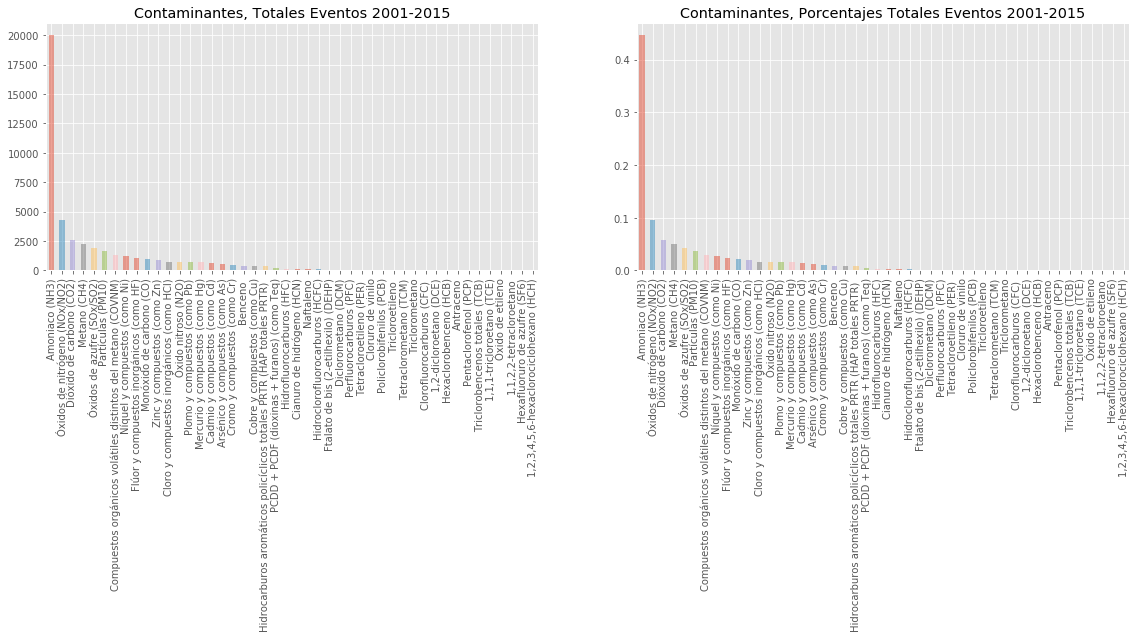

In [15]:
figure = plt.figure(figsize=(30,10))

plt.subplot2grid((2,3), (0,0))
dfEmiByComplexReduAir["Contaminante"].value_counts().plot(kind='bar', alpha=0.5)
plt.title('Contaminantes, Totales Eventos 2001-2015')

plt.subplot2grid((2,3), (0,1))
dfEmiByComplexReduAir["Contaminante"].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

plt.title('Contaminantes, Porcentajes Totales Eventos 2001-2015')

plt.show()

Calculamos las frecuencas relativas por tipo de Contaminantes emitidos para obtener porcentajes

Obtenemos un gráfico circular sencillo, observamos que el Amoniaco es uno de los Contaminantes más habituales, seguido por los Óxidos de Nitrogeno, Dióxido de Carbono y Metano

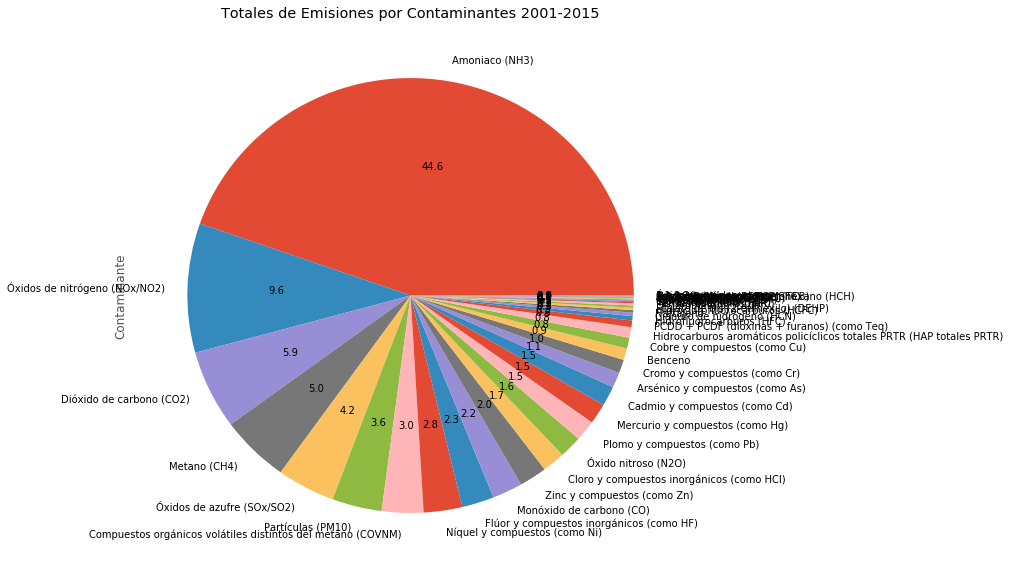

In [16]:
# Gráfico de tarta de porcentajes de Tipos de Contaminantes emitidos al Aire.
plot = dfEmiByComplexReduAir["Contaminante"].value_counts().plot(kind='pie', autopct='%.1f', 
                                            figsize=(10, 10),
                                            title='Totales de Emisiones por Contaminantes 2001-2015')

Obtenemos los diez Contaminantes más numerosos por la suma de Kilogramos emitidos a la atmosfera periodo 2001-2015

In [17]:
(dfEmiByComplexReduAir.groupby('Contaminante')[['Total_Kg']].sum()).sort_values(by='Total_Kg', ascending=False).head(10)

,Total_Kg
Contaminante,
Dióxido de carbono (CO2),2.006112e+12
Óxidos de azufre (SOx/SO2),9.020753e+09
Óxidos de nitrógeno (NOx/NO2),5.632728e+09
Monóxido de carbono (CO),3.798864e+09
Metano (CH4),2.445293e+09
Compuestos orgánicos volátiles distintos del metano (COVNM),8.796702e+08
Amoniaco (NH3),5.828544e+08
Partículas (PM10),3.823163e+08
Óxido nitroso (N2O),8.338749e+07


Ploteamos en un histograma los 10 Contaminantes por su Cantidad Emitida a la atmosfera (Kilogramos totales), observamos que aunque el Amoniaco es el más abundante por frecuencia, el Dióxido de Carbono es el más relevante por cantidad

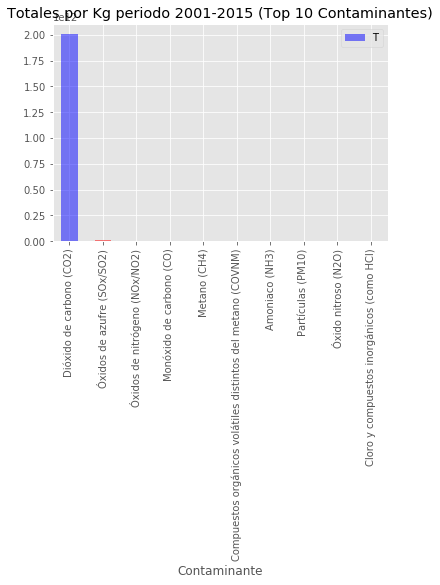

In [18]:
figure = plt.figure(figsize=(1,40))
(dfEmiByComplexReduAir.groupby('Contaminante')[['Total_Kg']].sum()).sort_values(by='Total_Kg', ascending=False).head(10).plot(kind='bar',alpha=0.5, color='br')

plt.title('Totales por Kg periodo 2001-2015 (Top 10 Contaminantes)')
plt.legend('Totales Kg periodo 2001-2015')
plt.show()  


Creamos una tabla de contingenica de porcentajes por tipos de emisiones y año

In [19]:
# tabla de contingencia en porcentajes relativos  
pd.crosstab(index=dfEmiByComplexReduAir['Year'], columns=dfEmiByComplexReduAir['Contaminante'],
            margins=True).apply(lambda r: r/len(dfEmiByComplexReduAir) *100,
                                axis=1)

Contaminante,"1,1,1-tricloroetano (TCE)","1,1,2,2-tetracloroetano","1,2,3,4,5,6-hexaclorociclohexano (HCH)","1,2-dicloroetano (DCE)",Amoniaco (NH3),Antraceno,Arsénico y compuestos (como As),Benceno,Cadmio y compuestos (como Cd),Cianuro de hidrógeno (HCN),...,Tetraclorometano (TCM),Triclorobencenos totales (TCB),Tricloroetileno,Triclorometano,Zinc y compuestos (como Zn),Óxido de etileno,Óxido nitroso (N2O),Óxidos de azufre (SOx/SO2),Óxidos de nitrógeno (NOx/NO2),All
Year,,,,,,,,,,,,,,,,,,,,,
2001,0.000000,0.000000,0.000000,0.002232,2.106626,0.000000,0.071411,0.044632,0.091495,0.013390,...,0.004463,0.000000,0.006695,0.004463,0.100422,0.000000,0.084801,0.365982,0.513267,5.326817
2002,0.000000,0.000000,0.000000,0.002232,1.727254,0.000000,0.071411,0.037937,0.093727,0.013390,...,0.002232,0.000000,0.006695,0.004463,0.120506,0.000000,0.044632,0.314655,0.526656,4.860414
2003,0.000000,0.000000,0.000000,0.000000,1.854455,0.000000,0.080337,0.044632,0.098190,0.008926,...,0.002232,0.000000,0.002232,0.004463,0.124969,0.000000,0.066948,0.301265,0.548972,5.279954
2004,0.002232,0.000000,0.000000,0.000000,2.367722,0.000000,0.091495,0.058021,0.116043,0.008926,...,0.002232,0.002232,0.004463,0.000000,0.129433,0.000000,0.087032,0.334739,0.653857,6.444846
2005,0.002232,0.000000,0.000000,0.000000,2.070920,0.000000,0.084801,0.055790,0.093727,0.011158,...,0.006695,0.002232,0.002232,0.000000,0.127201,0.000000,0.104885,0.296802,0.698489,5.944969
2006,0.002232,0.000000,0.002232,0.000000,2.463681,0.000000,0.078106,0.066948,0.153980,0.011158,...,0.004463,0.004463,0.004463,0.000000,0.116043,0.000000,0.107117,0.359287,0.731963,6.717101
2007,0.000000,0.000000,0.000000,0.000000,2.990337,0.002232,0.095959,0.075874,0.169601,0.024548,...,0.000000,0.000000,0.004463,0.006695,0.167370,0.002232,0.124969,0.374908,0.765437,7.940015
2008,0.000000,0.000000,0.000000,0.000000,3.157707,0.002232,0.087032,0.073643,0.127201,0.046863,...,0.000000,0.002232,0.006695,0.000000,0.145054,0.002232,0.147285,0.296802,0.765437,7.777108
2009,0.000000,0.000000,0.000000,0.002232,3.615184,0.004463,0.078106,0.066948,0.084801,0.022316,...,0.000000,0.000000,0.000000,0.002232,0.133896,0.002232,0.122738,0.232086,0.682868,7.348642


Generamos una tabla de contingencia de totales de Kilogramos Contaminantes por Tipo y Año emitidos en España

In [20]:
#CAMBIAR Y AGRUPAR POR TOTALES DE KG!!!!!!!!!!!!!!!
df1= pd.crosstab(index=dfEmiByComplexReduAir['Year'], columns=dfEmiByComplexReduAir['Contaminante'],
            margins=True).apply(lambda r: r/len(dfEmiByComplexReduAir) *100,
                                axis=1)


Ploteamos esta última con un gráfico "Bar Plot", para ver su evolución en los años de estudio

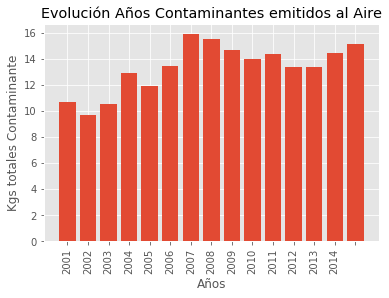

In [21]:
X=[]
for i in range(0,15):
    X.append(df1.iloc[i].sum())
    
Y =np.arange(2001,2015,1)

plt.bar(range(len(X)), X)
plt.xticks(np.arange(len(X)), Y,rotation='vertical')
plt.title('Evolución Años Contaminantes emitidos al Aire')
plt.xlabel("Años") 
plt.ylabel("Kgs totales Contaminante") 
plt.show()

#### Ploteando con Seaborn

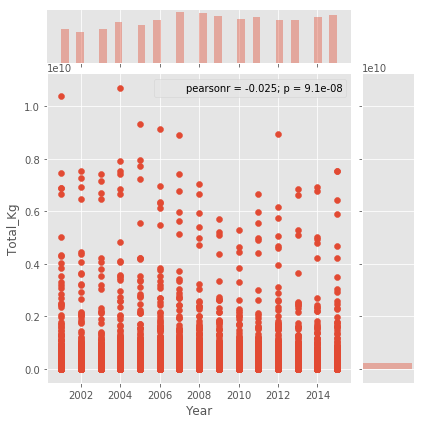

In [22]:
import seaborn as sns

sns.jointplot(data=dfEmiByComplexReduAir, x='Year', y='Total_Kg');

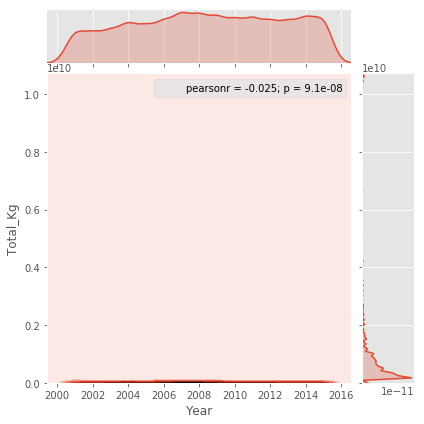

In [23]:
sns.jointplot(data=dfEmiByComplexReduAir, x='Year', y='Total_Kg', kind='kde');

Distribución por Latitud-Longitud

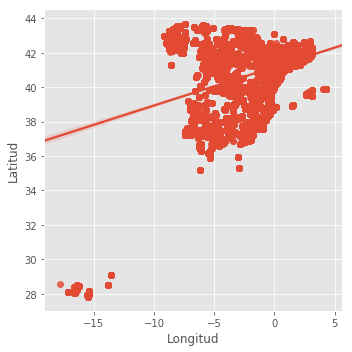

In [24]:
# Show the results of a linear regression
df = dfEmiByComplexReduAir
tips = sns.load_dataset("tips")
g = sns.lmplot(x="Longitud", y="Latitud", data=df)
